<a href="https://colab.research.google.com/github/emilia-uncc/Assignment1/blob/main/Assignment1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/DataSets/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
#sample.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Separate features and labels
X_1 = sample.values[:, 0]  # get input values from first column -- X_1 is a list here
X_2 = sample.values[:, 1]  # get input values from first column -- X_2 is a list here
X_3 = sample.values[:, 2]  # get input values from first column -- X_3 is a list here
Y = sample.values[:, 3]  # get output values from second column -- Y is the list here
m = len(Y)  # Number of training examples
n = len(X_1)  # Number of training examples

from IPython.display import display
display(sample)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [11]:
#initalizing X_0 Matrix
X_0 = np.ones((m, 1))

#from array to matrix reshape
X_1 = X_1.reshape(m, 1)
X_2 = X_2.reshape(m, 1)
X_3 = X_3.reshape(m, 1)

X = np.hstack((X_0, X_1, X_2, X_3))
X[:5]


array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [12]:
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [13]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

# Lets compute the cost for theta values
cost = compute_cost(X, Y, theta)
print('The cost for given values of theta_0 to theta_3 =', cost)


The cost for given values of theta_0 to theta_3 = 5.524438459196242


In [14]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

theta = [0., 0., 0., 0.]
iterations = 400
alpha = 0.1

theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)


Final value of theta = [ 5.21978029 -1.99038556  0.54816018 -0.25176667]
cost_history = [4.13064348 3.51770697 3.12758306 2.84173082 2.6232134  2.45337153
 2.31980849 2.21352203 2.12782089 2.05770031 1.99940853 1.95012933
 1.90774619 1.87066655 1.83769052 1.80791283 1.78064937 1.75538231
 1.7317189  1.70936057 1.68807977 1.66770254 1.64809537 1.62915539
 1.61080291 1.59297582 1.57562536 1.5587129  1.54220757 1.52608438
 1.51032287 1.49490602 1.4798195  1.46505102 1.45058989 1.43642665
 1.42255284 1.40896075 1.39564327 1.38259381 1.36980617 1.35727446
 1.3449931  1.3329567  1.32116011 1.30959833 1.29826652 1.28715998
 1.27627412 1.26560449 1.25514673 1.2448966  1.23484993 1.22500266
 1.21535081 1.20589048 1.19661787 1.18752924 1.17862092 1.16988935
 1.161331   1.15294244 1.1447203  1.13666127 1.12876211 1.12101965
 1.11343079 1.10599247 1.09870171 1.09155559 1.08455122 1.0776858
 1.07095657 1.06436083 1.05789594 1.05155929 1.04534834 1.0392606
 1.03329363 1.02744502 1.02171243 1.0160935

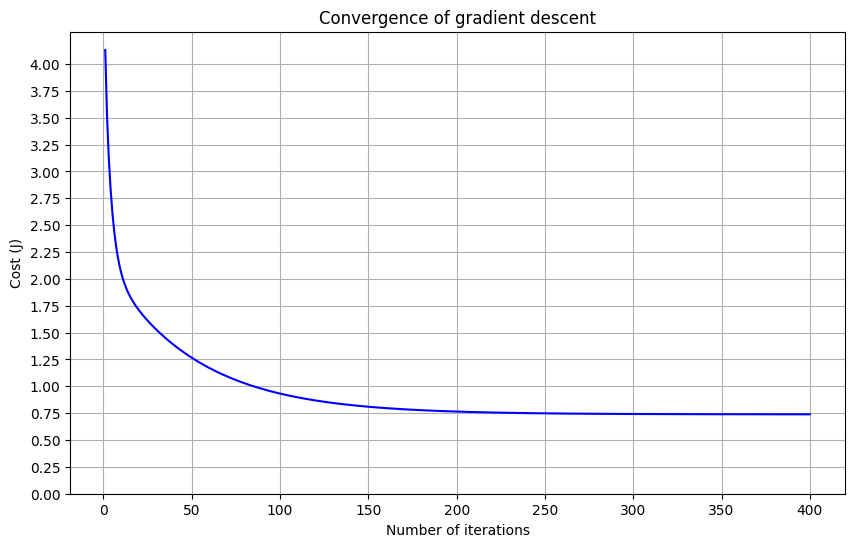

In [15]:

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
tick_values = np.arange(0, 4.1, 0.25)  # Customize these values as needed
tick_labels = [f'{val:.2f}' for val in tick_values]  # Customize label format as needed

# Set the tick locations and labels for the y-axis
plt.yticks(tick_values, tick_labels)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [16]:
print('Final value of theta =', theta)

#test data
testset1 = np.array([1, 1, 1])
testset2 = np.array([2, 0, 4])
testset3 = np.array([3, 2, 1])


#h(x)=theta_0 + theta_1*x1+theta_2*x2 +theta_3*x3
y1=0.0
for index, element in enumerate(theta):
  if(index ==0):
    y1=element
  elif(index<=len(testset1)):
    y1 += element*testset1[index-1]

print('Expected output for testset1: y= ', y1)

y2=0.0
for index, element in enumerate(theta):
  if(index ==0):
    y2=element
  elif(index<=len(testset2)):
    y2 += element*testset2[index-1]

print('Expected output for testset2: y= ', y2)

y3=0.0
for index, element in enumerate(theta):
  if(index ==0):
    y3=element
  elif(index<=len(testset3)):
    y3 += element*testset3[index-1]

print('Expected output for testset2: y= ', y3)



Final value of theta = [ 5.21978029 -1.99038556  0.54816018 -0.25176667]
Expected output for testset1: y=  3.525788247320534
Expected output for testset2: y=  0.23194250327021737
Expected output for testset2: y=  0.09317731240374821
